In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PSID
from PSID.evaluation import evalPrediction

In [2]:
# explore dimensions of behaviorally relevant dynamics
# in here all latent space dimensions will be used to prioritize behavior, meaning n1 = nx

PATH_FEATURES = "/home/lauraflyra/Documents/BCCN/Lab_Rotation_USC/Code/Data/py_neuromodulation_derivatives/sub-000_ses-right_task-force_run-3/sub-000_ses-right_task-force_run-3_FEATURES.csv"
data_features = pd.read_csv(PATH_FEATURES, index_col=0)

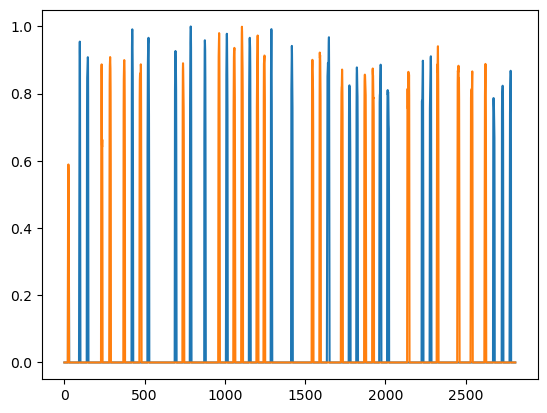

In [3]:
plt.plot(data_features["MOV_RIGHT_CLEAN"])
plt.plot(data_features["MOV_LEFT_CLEAN"])

In [4]:
from cross_validation_PSID import cross_validation, cross_validation_split

In [7]:
feature_df = pd.concat([data_features.filter(like='LFP'),data_features.filter(like='ECOG')], axis = 1).filter(like='bandpass_activity').to_numpy()
behavior_df = pd.concat([data_features["MOV_LEFT_CLEAN"], data_features["MOV_RIGHT_CLEAN"]], axis = 1).to_numpy()

behavior_df = data_features["MOV_RIGHT_CLEAN"].to_numpy().reshape(-1, 1)

K_FOLDS = 5
N_DIMS = 15

eval_over_dims = np.zeros((N_DIMS, K_FOLDS))
behavior_dims_latent = np.linspace(2, 30, N_DIMS, dtype=int)
for dim in range(N_DIMS):
    nx = n1 = behavior_dims_latent[dim]
    i = n1
    eval_over_dims[dim,:] = cross_validation(feature_df, behavior_df, K_FOLDS, nx, n1, i, metrics = 'R2')

Behavior decoding evaluation:
  PSID => 0.185
Behavior decoding evaluation:
  PSID => 0.32
Behavior decoding evaluation:
  PSID => 0.477
Behavior decoding evaluation:
  PSID => 0.336
Behavior decoding evaluation:
  PSID => 0.248
Behavior decoding evaluation:
  PSID => 0.228
Behavior decoding evaluation:
  PSID => 0.362
Behavior decoding evaluation:
  PSID => 0.53
Behavior decoding evaluation:
  PSID => 0.414
Behavior decoding evaluation:
  PSID => 0.242
Behavior decoding evaluation:
  PSID => 0.268
Behavior decoding evaluation:
  PSID => 0.38
Behavior decoding evaluation:
  PSID => 0.549
Behavior decoding evaluation:
  PSID => 0.424
Behavior decoding evaluation:
  PSID => 0.253
Behavior decoding evaluation:
  PSID => 0.305
Behavior decoding evaluation:
  PSID => 0.393
Behavior decoding evaluation:
  PSID => 0.539
Behavior decoding evaluation:
  PSID => 0.433
Behavior decoding evaluation:
  PSID => 0.24
Behavior decoding evaluation:
  PSID => 0.325
Behavior decoding evaluation:
  PSID =

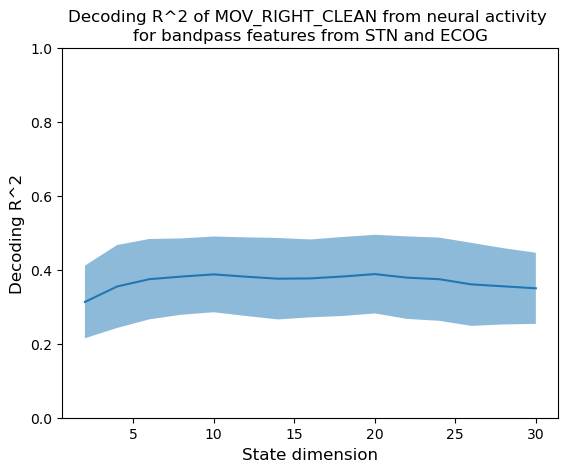

In [8]:
plt.plot(behavior_dims_latent, np.mean(eval_over_dims, axis = 1))
plt.fill_between(behavior_dims_latent, np.mean(eval_over_dims, axis = 1) - np.std(eval_over_dims, axis = 1), np.mean(eval_over_dims, axis = 1) + np.std(eval_over_dims, axis = 1), alpha = 0.5)
plt.ylim(0,1)
plt.ylabel("Decoding R^2", fontsize = 12)
plt.xlabel("State dimension", fontsize = 12)
plt.title("Decoding R^2 of MOV_RIGHT_CLEAN from neural activity \nfor bandpass features from STN and ECOG", fontsize = 12)
plt.show()

In [9]:
comb_behavior = (np.asarray(data_features["MOV_LEFT_CLEAN"] > 0.7, dtype = int)-1*np.asarray(data_features["MOV_RIGHT_CLEAN"] > 0.7)).reshape(-1, 1)
feature_df = pd.concat([data_features.filter(like='LFP'),data_features.filter(like='ECOG')], axis = 1).filter(like='bandpass_activity').to_numpy()

Behavior decoding r2:
  PSID => 0.354


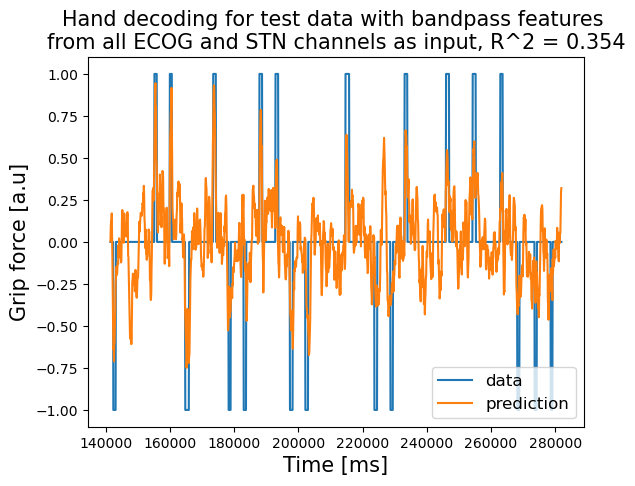

In [13]:
train_idx_features = np.arange(np.round(0.5 * data_features.shape[0]), dtype=int)
test_idx_features = np.arange(1 + train_idx_features[-1], data_features.shape[0])

feat_train = feature_df[train_idx_features]
feat_test =feature_df[test_idx_features]
mov_features_train = comb_behavior[train_idx_features]
mov_features_test = comb_behavior[test_idx_features]

idSys = PSID.PSID(feat_train, mov_features_train, 10,  10, 10)

mov_features_test_pred, feat_test_pred, x_feat_test_pred = idSys.predict(feat_test)

r2_feat = evalPrediction(mov_features_test, mov_features_test_pred, "R2")

print('Behavior decoding r2:\n  PSID => {:.3g}'.format(np.mean(r2_feat)))

time_array = data_features['time'].to_numpy().reshape(-1, 1)[test_idx_features]
plt.plot(time_array, mov_features_test.reshape(-1,), label = 'data')
plt.plot(time_array, mov_features_test_pred.reshape(-1,), label = 'prediction')
plt.title("Hand decoding for test data with bandpass features \nfrom all ECOG and STN channels as input, R^2 = {:.3g}".format(np.mean(r2_feat)), fontsize = 15)
plt.xlabel("Time [ms]", fontsize = 15)
plt.ylabel("Grip force [a.u]", fontsize = 15)
plt.legend(fontsize = 12)
plt.show()
